<a href="https://colab.research.google.com/github/doetools/graphics_computing/blob/main/3d_obj_from_height_depth_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
from PIL import Image
import numpy as np

In [108]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [109]:
fig_path = 'drive/My Drive/computer_graphics'

## Height Map
Following this [opengl tutorial](https://learnopengl.com/Guest-Articles/2021/Tessellation/Height-map)

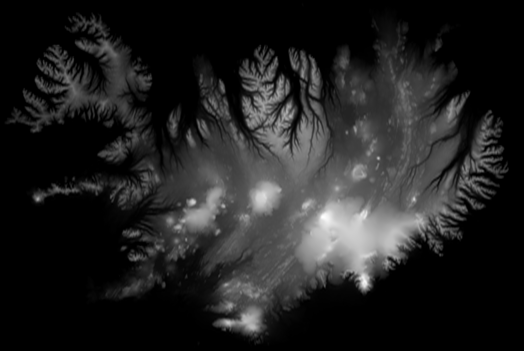

In [130]:
from numpy.ma.core import size
im = Image.open('drive/My Drive/computer_graphics/iceland_heightmap.png')
w, h = im.size
scale = 0.2
new_size = (int(w*scale), int(h*scale))
im.resize(new_size)

In [132]:

data = np.asarray(im)
data.shape

(1756, 2624, 4)

In [106]:
np.allclose(data[:,:,0],data[:,:,1])

True

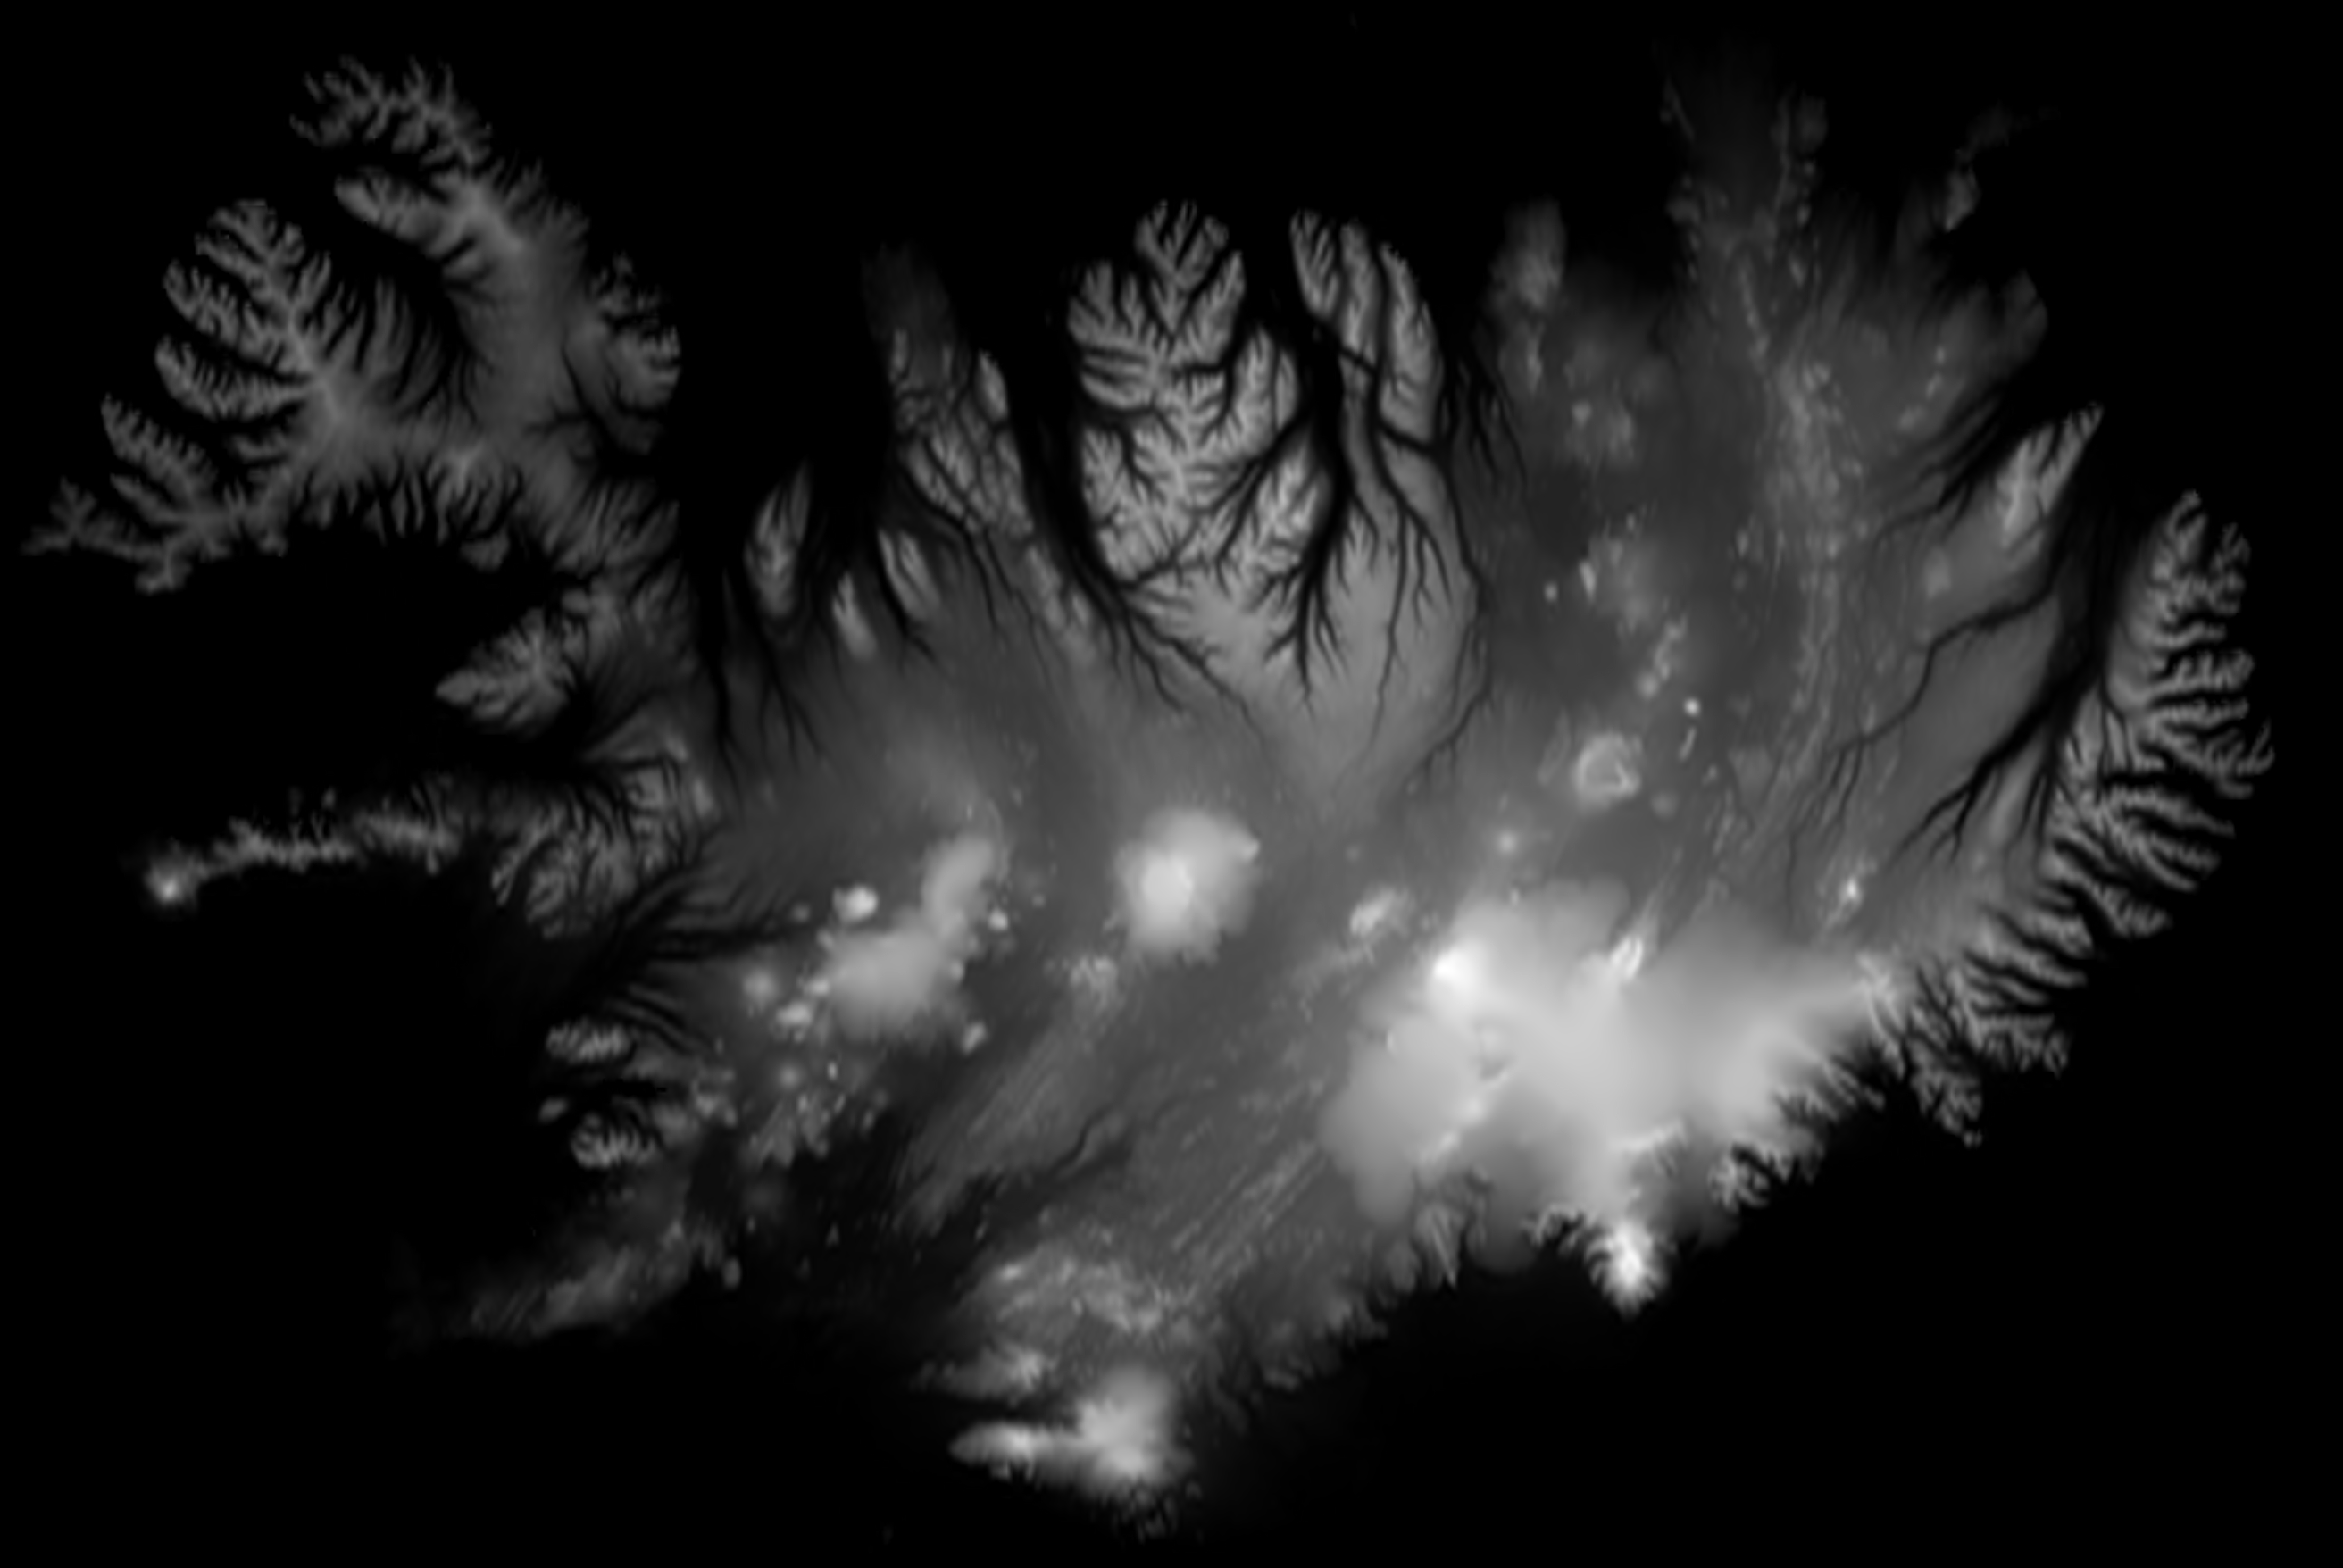

In [116]:
img_recon = Image.fromarray(data,"RGBA")
img_recon.show()